In [6]:
import time
import random
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy
import seaborn as sns
import copy
import yfinance as yf
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import RANSACRegressor, LinearRegression, TheilSenRegressor
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_absolute_error, median_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from pandas_datareader import data as pdr

# Get Dataset

In [8]:
yf.pdr_override()
df_full = pdr.get_data_yahoo("TSLA", start="2010-01-01").reset_index()
df_full.to_csv('TSLA.csv',index=False)
df_full.head()

[*********************100%***********************]  1 of 1 downloaded


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.00,25.00,17.54,23.89,23.89,18766300
1,2010-06-30,25.79,30.42,23.30,23.83,23.83,17187100
2,2010-07-01,25.00,25.92,20.27,21.96,21.96,8218800
3,2010-07-02,23.00,23.10,18.71,19.20,19.20,5139800
4,2010-07-06,20.00,20.00,15.83,16.11,16.11,6866900


# Explore Data

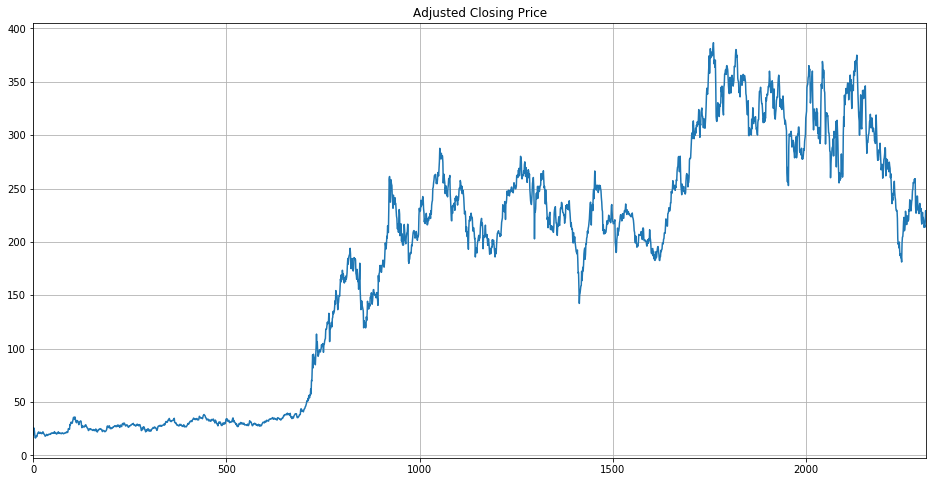

In [21]:
df_full['Adj Close'].plot(label='TSLA', figsize=(16,8), title='Adjusted Closing Price', grid=True)

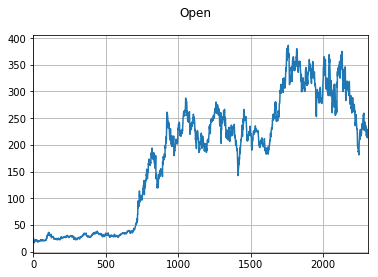

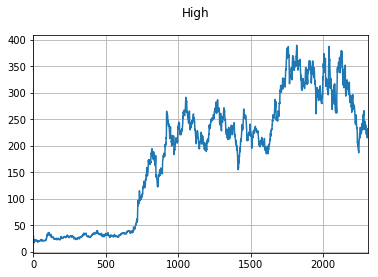

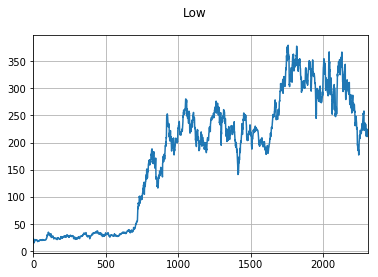

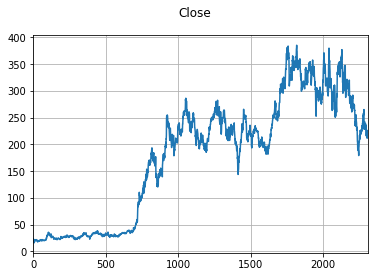

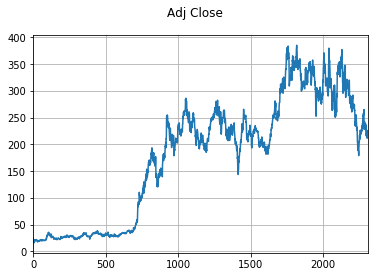

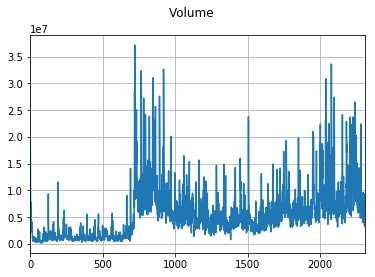

In [29]:
plot_count = 1
for feature in list(df_full.columns)[1:]:
    fig, ax = plt.subplots()
    df_full[feature].plot(label='TSLA', figsize=(15,10.5),grid=True, title=feature, subplots=True, ax=ax)
    plot_count += 1
plt.show()

In [43]:
window_size = 32 # Allow us to look at 32 days into the past
# Prepare the data so that we have 32 day windows and predict what the next day should be

# Get indices of access for the data
num_samples = len(df_full) - window_size
indices = np.arange(num_samples).astype(np.int)[:,None] + np.arange(window_size + 1).astype(np.int)
data = df_full['Adj Close'].values[indices] # Create the 2D matrix of training samples
print(data)
X = data[:,:-1] # Each row represents 32 days in the past
y = data[:,-1] # Each output value represents the 33rd day
y[1]

[[ 23.89  23.83  21.96 ...  17.9   17.6   18.32]
 [ 23.83  21.96  19.2  ...  17.6   18.32  18.78]
 [ 21.96  19.2   16.11 ...  18.32  18.78  19.15]
 ...
 [252.38 254.86 253.54 ... 214.08 215.59 221.71]
 [254.86 253.54 258.18 ... 215.59 221.71 225.61]
 [253.54 258.18 255.68 ... 221.71 225.61 225.01]]


18.78

In [121]:
# Preprocess Data
features = ['Open', 'High', 'Low', 'Close', 'Volume']
col_list = copy.copy(list(df_full.columns))
X=df_full[features].values
y=df_full['Adj Close'].values
print(X)
print(list(df_full.columns))
num_samples = len(df_full)
train_index = 0.8
split = int(num_samples * train_index)
x_train = X[:split]
y_train = y[:split]
x_test = X[split:]
y_test = y[split:]

[[1.90000e+01 2.50000e+01 1.75400e+01 2.38900e+01 1.87663e+07]
 [2.57900e+01 3.04200e+01 2.33000e+01 2.38300e+01 1.71871e+07]
 [2.50000e+01 2.59200e+01 2.02700e+01 2.19600e+01 8.21880e+06]
 ...
 [2.19000e+02 2.23400e+02 2.18000e+02 2.21710e+02 5.17950e+06]
 [2.29150e+02 2.32440e+02 2.24210e+02 2.25610e+02 9.32060e+06]
 [2.24080e+02 2.28950e+02 2.23160e+02 2.25010e+02 5.35410e+06]]
['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


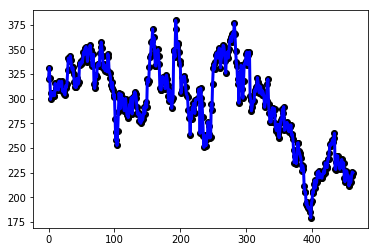

In [124]:
# Create Linear Regression
reg = LinearRegression()

# train the model using the training sets
reg.fit(x_train, y_train)

y_pred = reg.predict(x_test)


df_line = df_full.copy()
df_line.drop(features, axis=1, inplace=True)
df_line = df_line.iloc[split:]
df_line['Adj Close Test'] = y_pred
df_line.set_index('Date', inplace=True)

# print(df_line)
# print(y_test[0])
# print('R2: {}'.format(r2_score(y_test, y_pred)))
plt.scatter(range(len(y_test)), y_test, color='black')
plt.plot(y_pred, color='blue', linewidth=3)
# df_line.plot(label='TSLA', figsize=(16,8), title='Adjusted Closing Price', grid=True)
plt.show()

            Adj Close  Adj Close Test
Date                                 
2017-10-30     320.08      320.080300
2017-10-31     331.53      331.529655
2017-11-01     321.08      321.080470
2017-11-02     299.26      299.260429
2017-11-03     306.09      306.089046
...               ...             ...
2019-08-27     214.08      214.080279
2019-08-28     215.59      215.589992
2019-08-29     221.71      221.710024
2019-08-30     225.61      225.610509
2019-09-03     225.01      225.010506

[463 rows x 2 columns]
320.08


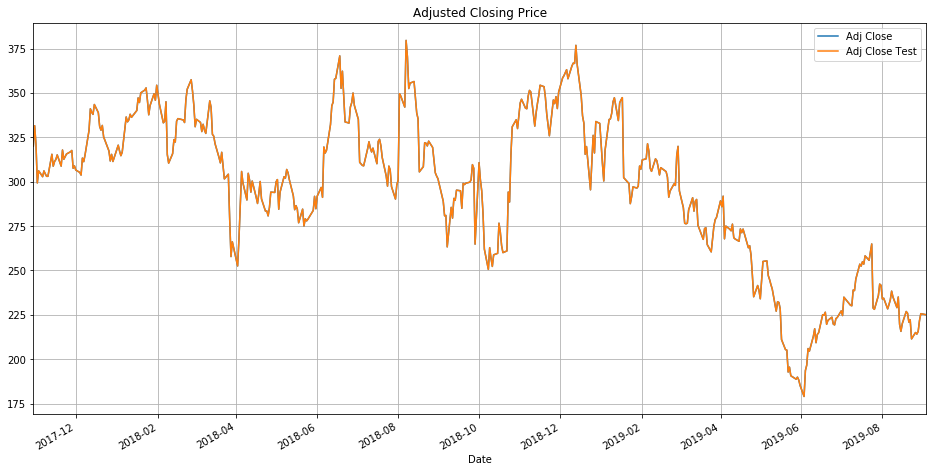

In [111]:
# Create Linear Regression
reg = Ridge()

# train the model using the training sets
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
df_line = df_full.copy()
df_line.drop(features, axis=1, inplace=True)
df_line = df_line.iloc[split:]
df_line['Adj Close Test'] = y_pred
df_line.set_index('Date', inplace=True)
print(df_line)
print(y_test[0])
df_line.plot(label='TSLA', figsize=(16,8), title='Adjusted Closing Price', grid=True)
plt.show()